# Stock Fundementals Exploration
This Notebook lets you explore any company's fundemental financial data with out data source being Yahoo finance(`yfinance`)

In [12]:
# Imports
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Choose Your Ticker

In [13]:
# Change this to wanted ticker
TICKER = 'AMZN'

stock = yf.Ticker(TICKER)
info = stock.info

print(f"Company:   {info.get('longName', 'N/A')}")
print(f"Sector:    {info.get('sector', 'N/A')}")
print(f"Industry:  {info.get('industry', 'N/A')}")
print(f"Market Cap: ${info.get('marketCap', 0):,.0f}")
print(f"Employees: {info.get('fullTimeEmployees', 'N/A'):,}")
print(f"Website:   {info.get('website', 'N/A')}")
print()
print(info.get('longBusinessSummary', 'No description available.')[:500])

Company:   Amazon.com, Inc.
Sector:    Consumer Cyclical
Industry:  Internet Retail
Market Cap: $2,199,155,900,416
Employees: 1,576,000
Website:   https://www.amazon.com

Amazon.com, Inc. engages in the retail sale of consumer products, advertising, and subscriptions service through online and physical stores in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It also manufactures and sells electronic devices, including Kindle, fire tablets, fire TVs, echo, ring, blink, and eero; and develops and produces media content. In addition, the company offers programs that enable 


# 2. Income Statement

In [14]:
income = stock.financials.T  # transpose so rows become years
income.index = income.index.year
income.index.name = 'Year'

# Key rows
key_income = ['Total Revenue', 'Gross Profit', 'Operating Income', 'Net Income']
available = [col for col in key_income if col in income.columns]

display(income[available] / 1e9)  # in billions

,Total Revenue,Gross Profit,Operating Income,Net Income
Year,,,,
2025,716.924,360.510,79.975,77.670
2024,637.959,311.671,68.593,59.248
2023,574.785,270.046,36.852,30.425
2022,513.983,225.152,12.248,-2.722


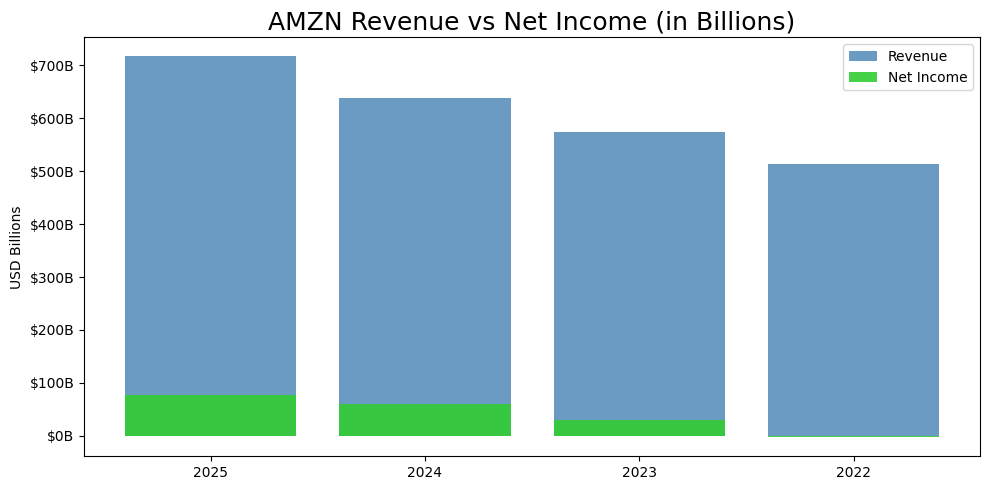

In [23]:
# Plot revenue vs net income
fig, ax = plt.subplots(figsize=(10,5))

x = income.index.astype(str)
if 'Total Revenue' in income.columns:
    ax.bar(x, income['Total Revenue'] / 1e9, label='Revenue', alpha=0.8, color='steelblue')
if 'Net Income' in income.columns:
    ax.bar(x, income['Net Income'] / 1e9, label='Net Income', alpha=0.9, color='limegreen')

ax.set_title(f'{TICKER} Revenue vs Net Income (in Billions)', fontsize=18)
ax.set_ylabel('USD Billions')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:.0f}B'))
ax.legend()
plt.tight_layout()
plt.show();

# 3. Margins Analysis

In [25]:
margins = pd.DataFrame(index=income.index)

if 'Gross Profit' in income.columns and 'Total Revenue' in income.columns:
    margins['Gross Margin %'] = (income['Gross Profit'] / income['Total Revenue'] * 100).round(2)
if 'Operating Income' in income.columns and 'Total Revenue' in income.columns:
    margins['Operating Margin %'] = (income['Operating Income'] / income['Total Revenue'] * 100).round(2)
if 'Net Income' in income.columns and 'Total Revenue' in income.columns:
    margins['Net Margin %'] = (income['Net Income'] / income['Total Revenue'] * 100).round(2)

display(margins)

,Gross Margin %,Operating Margin %,Net Margin %
Year,,,
2025,50.29,11.16,10.83
2024,48.85,10.75,9.29
2023,46.98,6.41,5.29
2022,43.81,2.38,-0.53


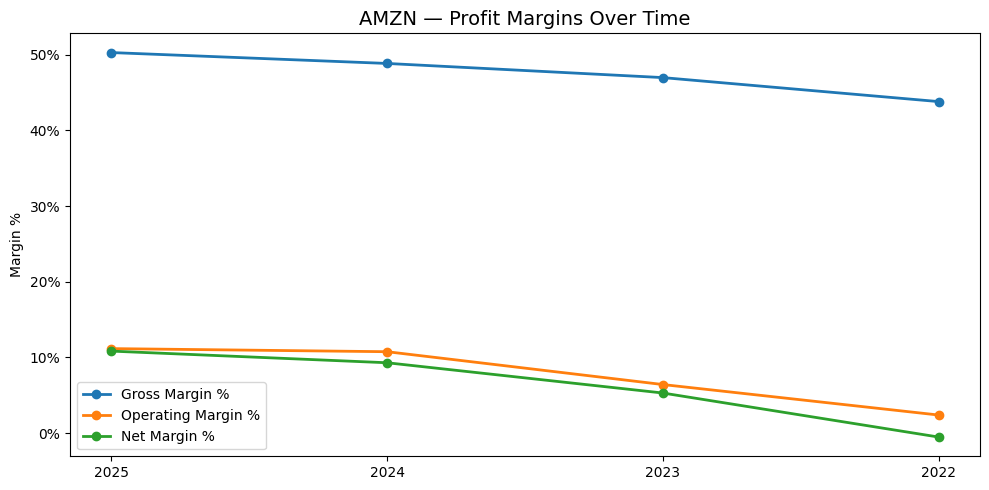

In [26]:
# Plot
fig, ax = plt.subplots(figsize=(10, 5))
for col in margins.columns:
    ax.plot(margins.index.astype(str), margins[col], marker='o', label=col, linewidth=2)

ax.set_title(f'{TICKER} — Profit Margins Over Time', fontsize=14)
ax.set_ylabel('Margin %')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}%'))
ax.legend()
plt.tight_layout()
plt.show()

# 4. Balance Sheet

In [28]:
balance = stock.balance_sheet.T
balance.index = balance.index.year
balance.index.name = 'Year'

key_balance = ['Total Assets', 'Total Liabilities Net Minority Interest', 
               'Stockholders Equity', 'Total Debt', 'Cash And Cash Equivalents']
available_b = [col for col in key_balance if col in balance.columns]

display(balance[available_b] / 1e9)

,Total Assets,Total Liabilities Net Minority Interest,Stockholders Equity,Total Debt,Cash And Cash Equivalents
Year,,,,,
2025,818.042,406.977,411.065,152.987,86.810
2024,624.894,338.924,285.970,130.900,78.779
2023,527.854,325.979,201.875,135.611,73.387
2022,462.675,316.632,146.043,140.118,53.888
2021,NaN,NaN,NaN,NaN,NaN


In [29]:
# Debt-to-Equity Ratio
if 'Total Debt' in balance.columns and 'Stockholders Equity' in balance.columns:
    dte = (balance['Total Debt'] / balance['Stockholders Equity']).round(2)
    print('Debt-to-Equity Ratio by Year:')
    display(dte.to_frame('D/E Ratio'))

Debt-to-Equity Ratio by Year:


,D/E Ratio
Year,
2025,0.37
2024,0.46
2023,0.67
2022,0.96
2021,NaN


# 5. Cash Flow Statement

In [32]:
cashflow = stock.cashflow.T
cashflow.index = cashflow.index.year
cashflow.index.name = 'Year'

key_cf = ['Operating Cash Flow', 'Capital Expenditure', 'Free Cash Flow']
available_cf = [col for col in key_cf if col in cashflow.columns]

display(cashflow[available_cf] / 1e9)

,Operating Cash Flow,Capital Expenditure,Free Cash Flow
Year,,,
2025,139.514,-131.819,7.695
2024,115.877,-82.999,32.878
2023,84.946,-52.729,32.217
2022,46.752,-63.645,-16.893
2021,NaN,NaN,NaN


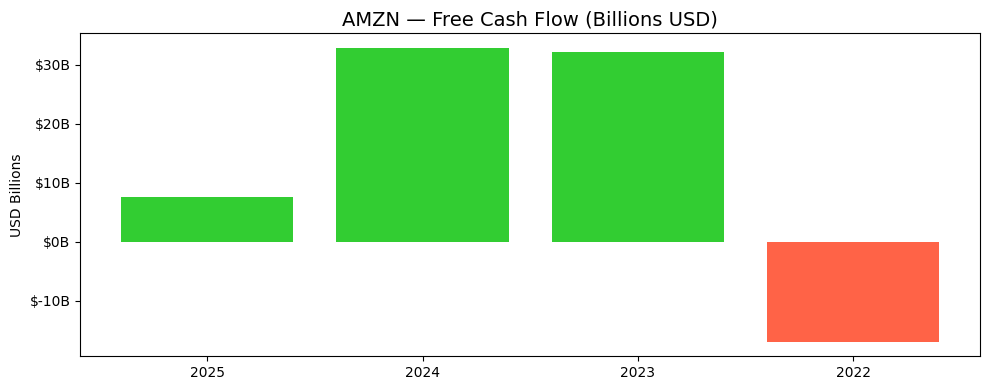

In [31]:
# Plot FCF
if 'Free Cash Flow' in cashflow.columns:
    fig, ax = plt.subplots(figsize=(10, 4))
    colors = ['limegreen' if v >= 0 else 'tomato' for v in cashflow['Free Cash Flow']]
    ax.bar(cashflow.index.astype(str), cashflow['Free Cash Flow'] / 1e9, color=colors)
    ax.set_title(f'{TICKER} — Free Cash Flow (Billions USD)', fontsize=14)
    ax.set_ylabel('USD Billions')
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:.0f}B'))
    plt.tight_layout()
    plt.show()

# 6. Key Valuation Metrics

In [33]:
metrics = {
    'P/E Ratio':             info.get('trailingPE'),
    'Forward P/E':           info.get('forwardPE'),
    'P/S Ratio':             info.get('priceToSalesTrailing12Months'),
    'P/B Ratio':             info.get('priceToBook'),
    'EV/EBITDA':             info.get('enterpriseToEbitda'),
    'EPS (TTM)':             info.get('trailingEps'),
    'Dividend Yield':        info.get('dividendYield'),
    'Beta':                  info.get('beta'),
    'Return on Equity':      info.get('returnOnEquity'),
    'Return on Assets':      info.get('returnOnAssets'),
    'Debt to Equity':        info.get('debtToEquity'),
    'Current Ratio':         info.get('currentRatio'),
    '52W High':              info.get('fiftyTwoWeekHigh'),
    '52W Low':               info.get('fiftyTwoWeekLow'),
    'Current Price':         info.get('currentPrice'),
}

metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])
metrics_df['Value'] = metrics_df['Value'].apply(lambda x: round(x, 4) if isinstance(x, float) else x)
display(metrics_df)

,Value
P/E Ratio,28.5718
Forward P/E,22.1133
P/S Ratio,3.0675
P/B Ratio,5.3480
EV/EBITDA,15.4710
EPS (TTM),7.1700
Dividend Yield,NaN
Beta,1.3850
Return on Equity,0.2229
Return on Assets,0.0693


# 7. Revenue Growth Rate

In [35]:
if 'Total Revenue' in income.columns:
    rev = income['Total Revenue'].sort_index()
    growth = rev.pct_change() * 100
    growth_df = pd.DataFrame({
        'Revenue ($B)': (rev / 1e9).round(2),
        'YoY Growth %': growth.round(2)
    })
    display(growth_df)

,Revenue ($B),YoY Growth %
Year,,
2022,513.98,NaN
2023,574.78,11.83
2024,637.96,10.99
2025,716.92,12.38


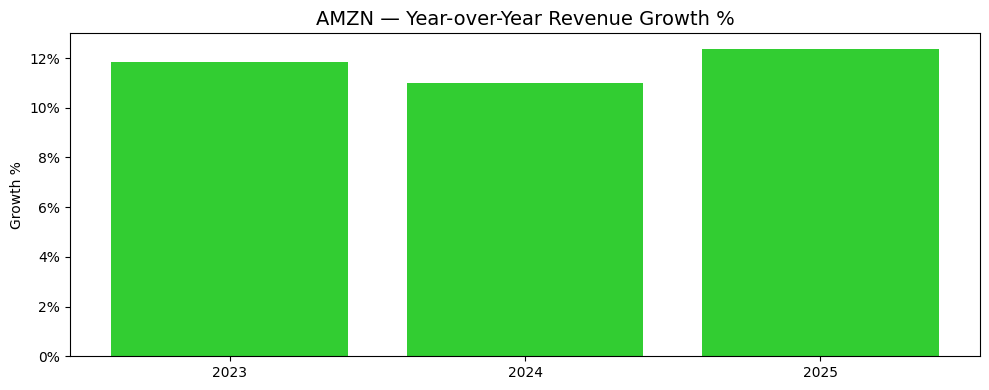

In [38]:
fig, ax = plt.subplots(figsize=(10, 4))
colours = ['limegreen' if v >= 0 else 'tomato' for v in growth.dropna()]
ax.bar(growth.dropna().index.astype(str), growth.dropna(), color=colors)
ax.set_title(f'{TICKER} — Year-over-Year Revenue Growth %', fontsize=14)
ax.set_ylabel('Growth %')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}%'))
plt.tight_layout()
plt.show()

# Save data to JSON

In [39]:
import os
os.makedirs('../data/raw', exist_ok=True)

income.to_json(f'../data/raw/{TICKER}_income.json', orient='records', indent=4)
balance.to_json(f'../data/raw/{TICKER}_balance.json', orient='records', indent=4)
cashflow.to_json(f'../data/raw/{TICKER}_cashflow.json', orient='records', indent=4)
metrics_df.to_json(f'../data/raw/{TICKER}_metrics.json', orient='records', indent=4)

print(f'Data saved to data/raw/ for {TICKER}')

Data saved to data/raw/ for AMZN
